# **`Regulized Regression Model`**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
np.random.seed(1234)
n_samples = 30
X = np.sort(np.random.rand(n_samples)) # X.shape -> (n_samples,)
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
X = X.reshape(X.shape[0], 1) # X.shape -> (n_samples, 1)
print(X.shape, y.shape)

(30, 1) (30,)


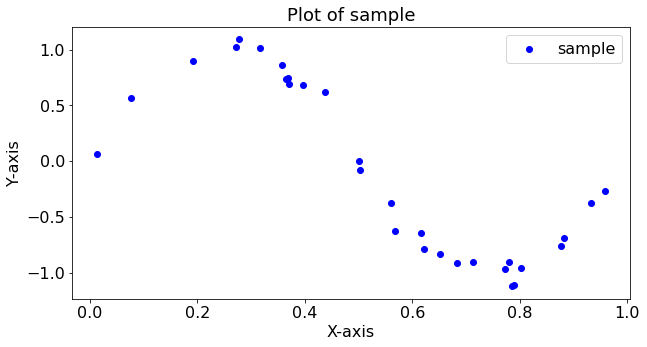

In [3]:
font_size = 16

plt.figure(figsize=(10, 5))
plt.scatter(x=X, y=y,
            c='blue', marker='o',
            label='sample')
plt.xlabel('X-axis', fontsize=font_size) # x축의 이름과 글자 크기
plt.ylabel('Y-axis', fontsize=font_size) # y축의 이름과 글자 크기

plt.xticks(fontsize=font_size) # x축의 숫자 크기
plt.yticks(fontsize=font_size) # y축의 숫자 크기

plt.title('Plot of sample', fontsize=(font_size+2)) # 그림의 제목과 글자 크기
plt.legend(fontsize=font_size)
plt.show()

In [4]:
ordinary_regressor = LinearRegression().fit(X, y) # 선형회귀분석
pred_ordinary = ordinary_regressor.predict(X) # 예측
b1_ordinary = ordinary_regressor.coef_
print("Coef of ordinary regressor: ", b1_ordinary)

Coef of ordinary regressor:  [-2.40718439]


In [5]:
ridge_regressor = Ridge(alpha=0.25).fit(X, y) # Ridge 회귀분석
pred_ridge = ridge_regressor.predict(X) # 예측
b1_ridge = ridge_regressor.coef_
print("Coef of ridge regressor: ", b1_ridge)

Coef of ridge regressor:  [-2.12693287]


In [6]:
print("회귀계수가 줄어들었나요? 맞으면 True, 틀리면 False => ", abs(b1_ordinary) > abs(b1_ridge))

회귀계수가 줄어들었나요? 맞으면 True, 틀리면 False =>  [ True]


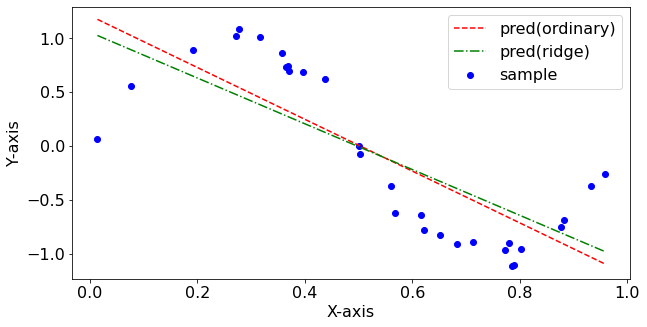

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X, y=y,
            c='blue', marker='o',
            label='sample')
plt.plot(X, pred_ordinary,
         c='red', linestyle='--',
         label='pred(ordinary)')
plt.plot(X, pred_ridge,
         c='green', linestyle='-.',
         label='pred(ridge)')
plt.xlabel('X-axis', fontsize=font_size) # x축의 이름과 글자 크기
plt.ylabel('Y-axis', fontsize=font_size) # y축의 이름과 글자 크기

plt.xticks(fontsize=font_size) # x축의 숫자 크기
plt.yticks(fontsize=font_size) # y축의 숫자 크기

plt.legend(fontsize=font_size)
plt.show()

In [8]:
var_pred_ordinary = np.var(pred_ordinary) # ordinary 회귀 기반 예측값의 분산
var_pred_ridge = np.var(pred_ridge) # ridge 회귀 기반 예측값의 분산

print("분산이 줄어들었나요? 맞으면 True, 틀리면 False => ", var_pred_ordinary > var_pred_ridge)

분산이 줄어들었나요? 맞으면 True, 틀리면 False =>  True


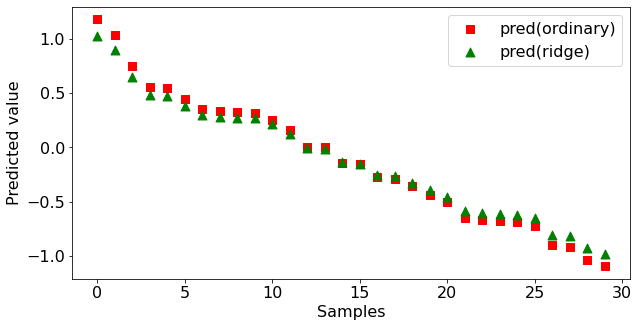

In [9]:
plt.figure(figsize=(10, 5))
sample_x = [range(n_samples)]
plt.scatter(x=sample_x, y=pred_ordinary,
            c='red', marker='s',
            s=70, # marker 크기
            label='pred(ordinary)')
plt.scatter(x=sample_x, y=pred_ridge,
            c='green', marker='^',
            s=80,
            label='pred(ridge)')
plt.xlabel('Samples', fontsize=font_size) # x축의 이름과 글자 크기
plt.ylabel('Predicted value', fontsize=font_size) # y축의 이름과 글자 크기

plt.xticks(fontsize=font_size) # x축의 숫자 크기
plt.yticks(fontsize=font_size) # y축의 숫자 크기

plt.legend(fontsize=font_size)
plt.show()

[-2.40718439]
[array([-1.57635956]), array([-1.58176487]), array([-1.62742273]), array([-1.9051318]), array([-2.04747517]), array([-2.17763829]), array([-2.23863058]), array([-2.27401483]), array([-2.2971204])]


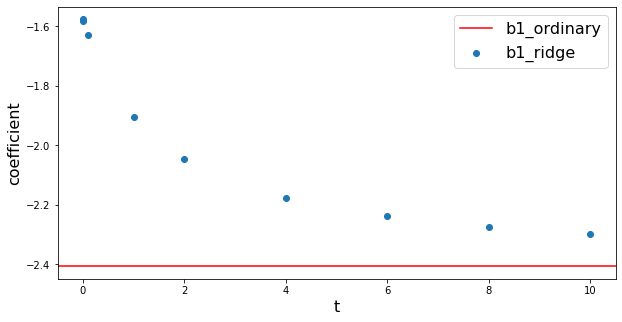

In [12]:
range_t = [0, 0.01, 0.1, 1, 2, 4, 6, 8, 10]
ridge_coef = []
for alpha in range_t:
  t = 1 / (alpha+1)
  ridge_regressor = Ridge(alpha=t).fit(X, y)
  ridge_coef.append(ridge_regressor.coef_)
print(b1_ordinary)
print(ridge_coef)

plt.figure(figsize=(10, 5))
plt.scatter(x=range_t, y=ridge_coef,
            label='b1_ridge')
plt.axhline(b1_ordinary,
            c='red', label='b1_ordinary')
plt.xlabel('t', fontsize=font_size) # x축의 이름과 글자 크기
plt.ylabel('coefficient', fontsize=font_size) # y축의 이름과 글자 크기

plt.legend(fontsize=font_size)
plt.show()

In [ ]:
b1_ordinary

array([-2.40718439])

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
%matplotlib inline
boston = load_boston()

X = boston.data
X = X[:, 0:3]
y = boston.target
print(X.shape, y.shape)

(506, 3) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
lasso_regressor = Lasso(alpha=0.25).fit(X, y)
print(lasso_regressor.coef_)

[-0.24666993  0.05901713 -0.41031676]


In [41]:
range_t = [0, 0.01, 0.1, 1, 2, 4, 6, 8, 10, 30, 50, 70, 90, 100]
lasso_coef = []

for alpha in range_t:
#  t = 1 / (alpha + 1)
  lasso_regressor = Lasso(alpha=alpha).fit(X, y)
  lasso_coef.append(lasso_regressor.coef_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e+04, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [42]:
coef_df = pd.DataFrame(lasso_coef,
                       columns=['crim', 'zn', 'indus'])
print(coef_df.shape)

(14, 3)


In [43]:
coef_crim = coef_df['crim'].tolist()
coef_zn = coef_df['zn'].tolist()
coef_indus = coef_df['indus'].tolist()

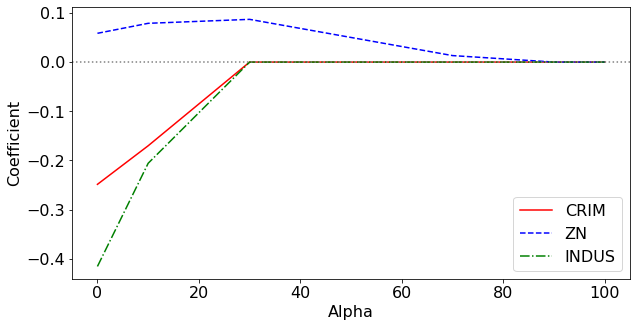

In [46]:
font_size = 16
plt.figure(figsize=(10, 5))
plt.plot(range_t, coef_crim,
         c='red', linestyle='-',
         label='CRIM')
plt.plot(range_t, coef_zn,
         c='blue', linestyle='--',
         label='ZN')
plt.plot(range_t, coef_indus,
         c='green', linestyle='-.',
         label='INDUS')
plt.axhline(0, c='gray', linestyle=':')
plt.xlabel('Alpha', fontsize=font_size)
plt.ylabel('Coefficient', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.legend(fontsize=font_size)
plt.show()